In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\amirt\OneDrive\Documents\Projects\ML-projects\Notebooks\UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df = df.drop(["ID"],axis = 1)
df.rename(columns={'default.payment.next.month': 'def_pay'}, inplace=True)

In [5]:
cat_list = [feature for feature in df.columns if len(df[feature].unique()) <12]
num_list = [feature for feature in df.columns if feature not in cat_list]
print("There are",len(cat_list)," categorical features of df are ", cat_list)
print("There are",len(num_list),"numerical features of df are ", num_list)

There are 10  categorical features of df are  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay']
There are 14 numerical features of df are  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [6]:
df.loc[df['EDUCATION'].isin([0, 4, 5, 6]), 'EDUCATION'] = 0

In [7]:
# Convert the selected categorical columns to object type
df[cat_list] = df[cat_list].astype('object')
df["def_pay"] = df["def_pay"].astype("int64")

In [8]:
df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df['total_pay_amount'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [10]:
df['total_payment_delay'] = df['PAY_0'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']
df.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
], axis=1, inplace=True)


In [11]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,def_pay,total_bill_amt,total_pay_amount,total_payment_delay
0,20000.0,2,2,1,24,1,7704.0,689.0,-2
1,120000.0,2,2,2,26,1,17077.0,5000.0,3
2,90000.0,2,2,2,34,0,101653.0,11018.0,0
3,50000.0,2,2,1,37,0,231334.0,8388.0,0
4,50000.0,1,2,1,57,0,109339.0,59049.0,-2


In [12]:
X = df.drop('def_pay',axis=1)
y= df['def_pay']

In [13]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform label encoding on categorical variables
label_encoder = LabelEncoder()
X_train['EDUCATION'] = label_encoder.fit_transform(X_train['EDUCATION'])
X_test['EDUCATION'] = label_encoder.transform(X_test['EDUCATION'])

# Drop the original education column
X_train.drop('EDUCATION', axis=1, inplace=True)
X_test.drop('EDUCATION', axis=1, inplace=True)

# Scale the numeric columns using StandardScaler
scaler = StandardScaler()
columns_to_scale = ['total_bill_amt', 'total_pay_amount', 'total_payment_delay', 'LIMIT_BAL']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Print the preprocessed train and test sets
print("X_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_train:\n", y_train.head())
print("\ny_test:\n", y_test.head())


X_train:
        LIMIT_BAL SEX MARRIAGE  AGE  total_bill_amt  total_pay_amount   
21753  -0.672359   2        2   24        0.304560         -0.279159  \
251    -1.057768   1        2   28       -0.352884         -0.375544   
22941   0.098459   2        1   44       -0.607355         -0.213920   
618    -0.826523   1        2   25        0.001265         -0.323841   
17090  -0.286950   2        2   25        1.144973          0.035674   

       total_payment_delay  
21753             0.185020  
251               0.185020  
22941            -0.493616  
618               0.185020  
17090             0.185020  

X_test:
        LIMIT_BAL SEX MARRIAGE  AGE  total_bill_amt  total_pay_amount   
2308   -1.057768   1        2   25       -0.520980         -0.344732  \
22404  -0.132786   2        2   26        0.971416         -0.188337   
23397  -0.749441   2        1   32        0.394994         -0.249075   
25058  -0.286950   1        2   49       -0.470037         -0.156463   
2664   -0.903

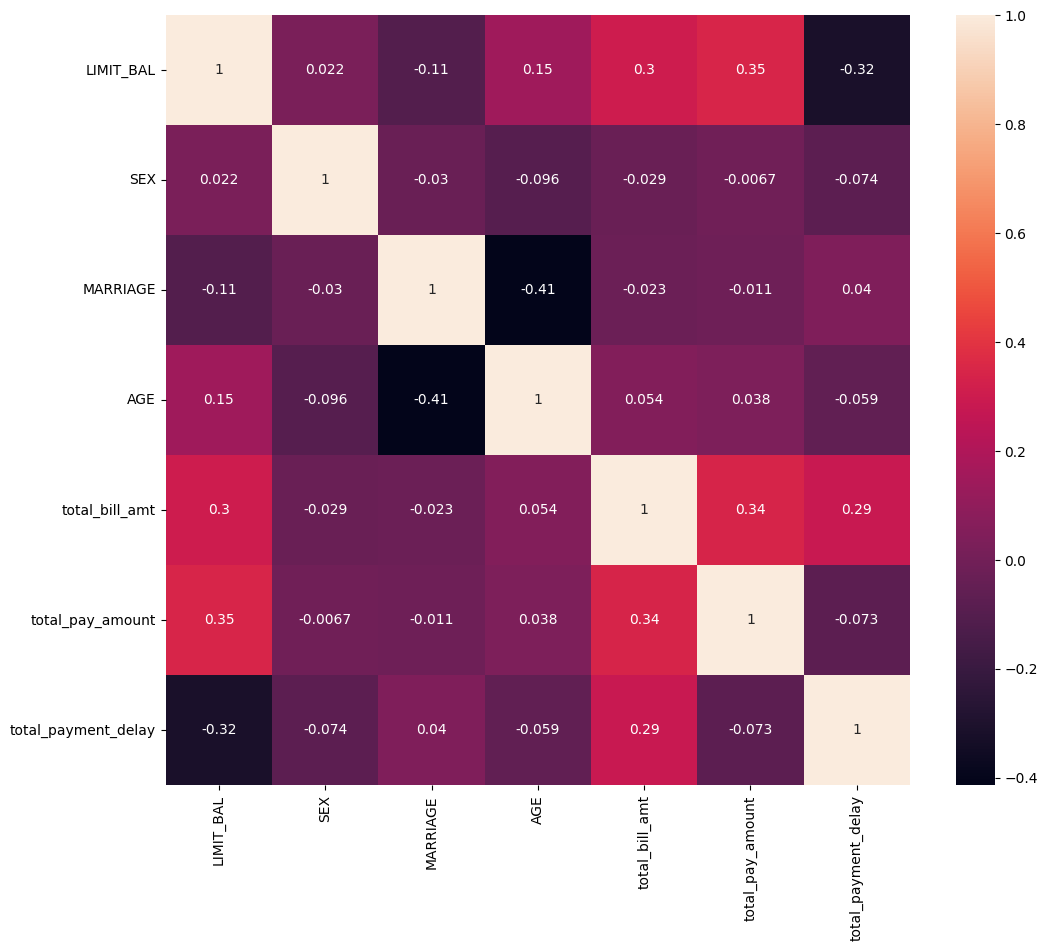

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [16]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train,y_train)
loreg_pred = loreg.predict(X_test)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.7957
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4687
           1       0.64      0.15      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.56      0.56      6000
weighted avg       0.77      0.80      0.74      6000



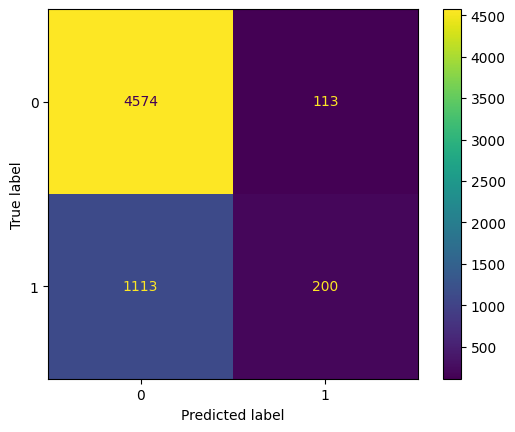

In [17]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test, y_test)

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.7142
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4687
           1       0.36      0.38      0.37      1313

    accuracy                           0.71      6000
   macro avg       0.59      0.59      0.59      6000
weighted avg       0.72      0.71      0.72      6000



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

In [20]:
# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)

# Compute the accuracy score
score = accuracy_score(y_test, knn_pred)

# Compute the classification report
cr = classification_report(y_test, knn_pred)

# Print the results
print("K-Nearest Neighbors")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

K-Nearest Neighbors
Accuracy Score value: 0.7807
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4687
           1       0.50      0.27      0.35      1313

    accuracy                           0.78      6000
   macro avg       0.66      0.60      0.61      6000
weighted avg       0.75      0.78      0.76      6000



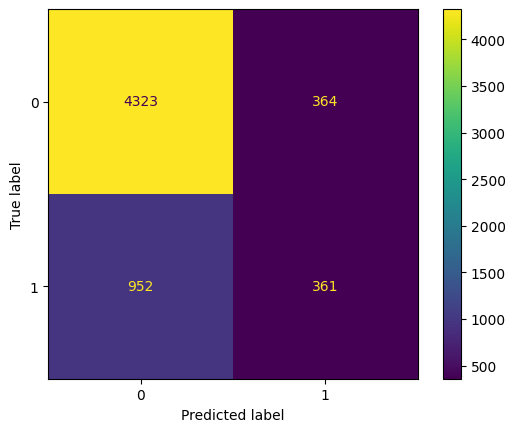

In [21]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy Score</th>
  </tr>
  <tr>
    <td></td>
    <td>97.26%</td>
  </tr>
  <tr>
    <td>Decision Tree Classifier</td>
    <td>97.26%</td>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>95.89%</td>
  </tr>
  <tr>
    <td>KNeighbors Classifier</td>
    <td>95.89%</td>
  </tr>
  <tr>
    <td>Random Forest Classifier</td>
    <td>95.89%</td>
  </tr>
</table>


In [26]:
#Compresssing the pickle file which has 5 features to build Web Application
import bz2,pickle
file = bz2.BZ2File('classification.pkl','wb')
pickle.dump(loreg,file)
file.close()